In [4]:
import numpy as np
import pandas
import os
import json
import cv2
import glob

import matplotlib
import scipy.misc

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

In [5]:
def calibrateCamera(imagesPath, rows, cols):
    images = glob.glob(imagesPath)

    objpoints = []
    imgpoints = []

    objp = np.zeros((rows * cols, 3), np.float32)
    objp[:, :2] = np.mgrid[0:cols, 0:rows].T.reshape(-1, 2)

    for imagePath in images:
        img = mpimg.imread(imagePath)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (cols, rows), None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return mtx, dist

In [6]:
rows = 6
cols = 9
images = 'camera_cal/calibration*.jpg'
mtx,dist = calibrateCamera(images,rows,cols)


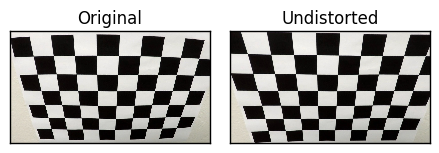

In [7]:
def undistort_image(img, mtx, dist):
    undist_img = cv2.undistort(img, mtx, dist, None, mtx)
    return undist_img


def plot_images(images, rows, cols, titles):
    """Samples images randomly"""
    gs = gridspec.GridSpec(rows, cols, top=1.0, bottom=.0, right=.7, left=0., hspace=0.3,
                           wspace=0.1)

    for index, g in enumerate(gs):
        ax = plt.subplot(g)
        img = images[index]
        ax.imshow(img)
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        ax.set_xticks([])
        ax.set_yticks([])
        plt.title(titles[index])

    plt.show()

img = mpimg.imread('camera_cal/calibration2.jpg')
undistorted = undistort_image(img, mtx,dist)    
plot_images([img,undistorted], 1, 2, ['Original', 'Undistorted'])

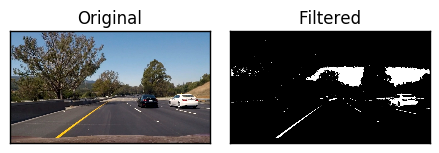

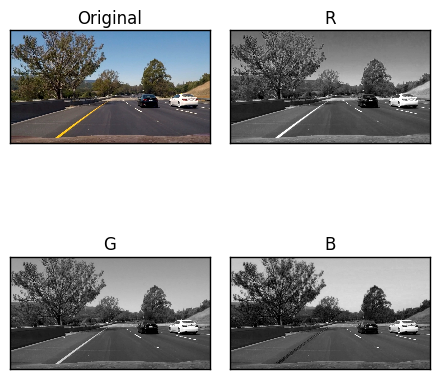

In [9]:
image = mpimg.imread('test_images/test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

plot_images([image, binary], 1 , 2, ['Original', 'Filtered'])

R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

plot_images([image, R, G, B], 2 , 2, ['Original', 'R', 'G', 'B'])

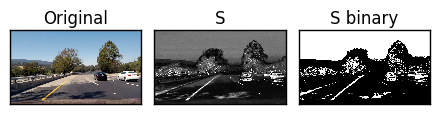

In [10]:
image = mpimg.imread('test_images/test4.jpg')

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

s_thresh = (90, 255)
s_binary = np.zeros_like(S)
s_binary[(S > s_thresh[0]) & (S <= s_thresh[1])] = 1

plot_images([image, S, s_binary], 1 , 3, ['Original', 'S', 'S binary'])


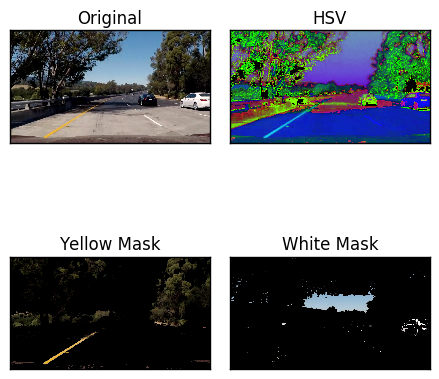

In [11]:
def apply_color_mask(hsv,img,low,high):
    mask = cv2.inRange(hsv, low, high)
    res = cv2.bitwise_and(img,img, mask= mask)
    return res

image = mpimg.imread('test_images/test5.jpg')
hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)

yellow_hsv_low  = np.array([ 0, 80, 0])
yellow_hsv_high = np.array([ 80, 255, 255])
yellow_mask = apply_color_mask(hsv,image,yellow_hsv_low,yellow_hsv_high)

white_hsv_low  = np.array([  20,   0,   180])
white_hsv_high = np.array([ 255,  80, 255])
white_mask = apply_color_mask(hsv,image,white_hsv_low,white_hsv_high)

plot_images([image, hsv, yellow_mask, white_mask], 2 , 2, ['Original', 'HSV', 'Yellow Mask', 'White Mask'])




In [55]:
def apply_mask(img, low, high):
    ch1 = img[:,:,0]
    ch2 = img[:,:,1]
    ch3 = img[:,:,2]
    binary = np.zeros_like(ch1)
    binary[(ch1 > low[0]) & (ch1 <= high[0])
           & (ch2 > low[1]) & (ch2 <= high[1])
           & (ch3 > low[2]) & (ch3 <= high[2])] = 1
    return binary

def apply_mask_one_channel(img, low, high):
    binary = np.zeros_like(img)
    binary[img > low & img <= high] = 1
    return binary

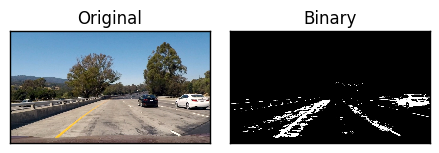

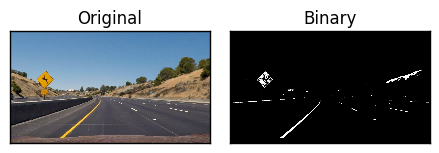

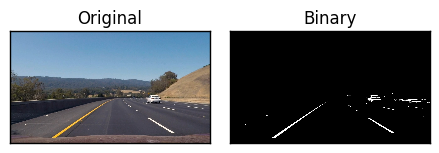

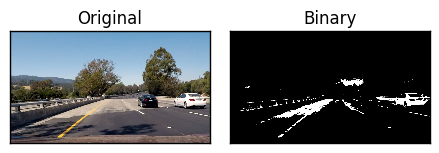

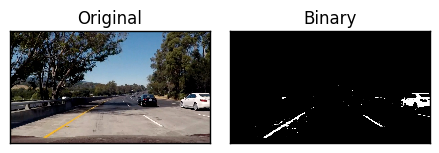

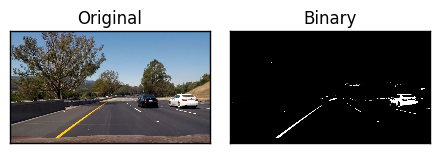

In [44]:
rgb_low = [200, 150, 0]
rgb_high = [255, 255, 255]

#this is good for yellow
# yellow_low = [200, 146, 0]
# yellow_high = [255, 255, 150]

# yellow_low = [180, 200, 200]
# yellow_high = [255, 255, 255]

# yellow_low = [25, 146, 190]
# yellow_high = [62, 174, 250]

for i in range(6):
    image = mpimg.imread('test_images/test'+str(i+1)+'.jpg')
    ylw = apply_mask(image, rgb_low, rgb_high)
    plot_images([image, ylw], 1 , 2, ['Original', 'Binary'])

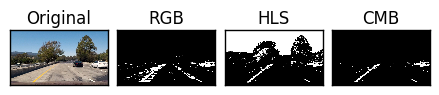

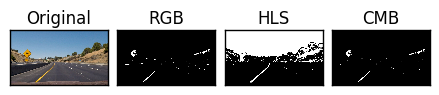

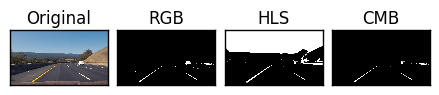

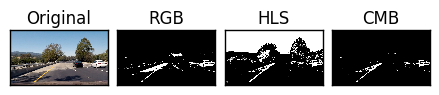

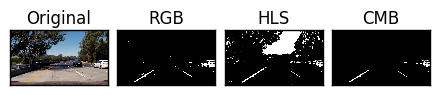

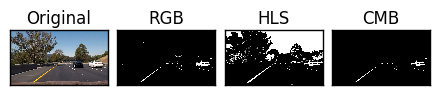

In [61]:
s_low = [0, 40, 75]
s_high = [255, 255, 255]

for i in range(6):
    image = mpimg.imread('test_images/test'+str(i+1)+'.jpg')
    rgb_m = apply_mask(image, rgb_low, rgb_high)
    
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls_m = apply_mask(hls, s_low, s_high)
    cmb_m = cv2.bitwise_and(rgb_m, hls_m)
    plot_images([image, rgb_m, hls_m,cmb_m], 1 , 4, ['Original', 'RGB','HLS', 'CMB'])